<a href="https://colab.research.google.com/github/Shamshadalikhatri/Speech/blob/master/lec_1_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**simple linear regression**

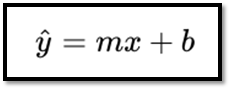

In [ ]:
data = np.random.randn(500, 2) #x=data[:,0], y=data[:,1]
theta = np.zeros(2) #[theta_0, theta_1]

**Mean square error cost/loss function**

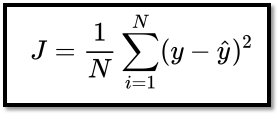

In [ ]:
def loss_function(data,theta):
  m = theta[0]
  b = theta[1]
  loss=0
  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]
    y_hat = (m*x + b)
    loss = loss + ((y - (y_hat)) ** 2)
  mse = loss / float(len(data))
  return mse

In [ ]:
loss_function(data, theta)

1.0094899040180658

**Compute gradients of the loss function:**

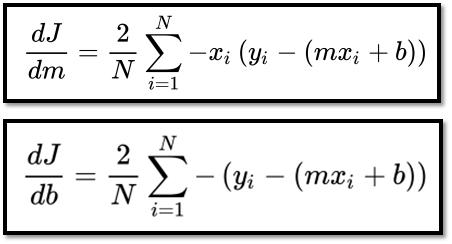

In [ ]:
def compute_gradients(data, theta):
  gradients = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b = theta[1]
  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]
    gradients[0] += -x * (y - (( m* x) + b))
    gradients[1] += -(y - ((m * x) + b))
  gradients = (2*gradients/N)
  return gradients

In [ ]:
compute_gradients(data,theta)

array([ 0.16183936, -0.02613313])

Updating gradients on just one iteration will not lead us to convergence, that is, the minimum of the cost function, so we need to compute gradients and update the model parameter for several iterations.

In [ ]:
num_iterations = 100
lr = 1e-2 # 0.01
loss = []
theta = np.zeros(2)
for t in range(num_iterations):
  #compute gradients
  gradients = compute_gradients(data, theta)
  #update parameter
  theta = theta - (lr*gradients) # update the parameters
  #store the loss
  loss.append(loss_function(data,theta))

Text(0.5, 1.0, 'Gradient Descent')

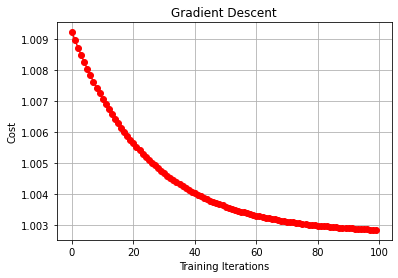

In [ ]:
plt.plot(loss,'-ro')
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

**Task:01: Analyze the performance by changing the learning rate and number of iterationa.**

**Task:02: Repeat the procedure by using L1 and L2 regularization in loss function (optional)**

**mini batch gradient descent**

In [ ]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.05,num_iterations = 500):
  minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
  loss=[]
  for t in range(num_iterations):
    sample_size = random.sample(range(len(data)), minibatch_size)
    np.random.shuffle(data)
    sample_data = data[0:sample_size[0], :]
    grad = compute_gradients(sample_data, theta)
    theta = theta - (lr * grad)
    loss.append(loss_function(data,theta))
  return theta, loss

Text(0.5, 1.0, 'mini batch Gradient Descent')

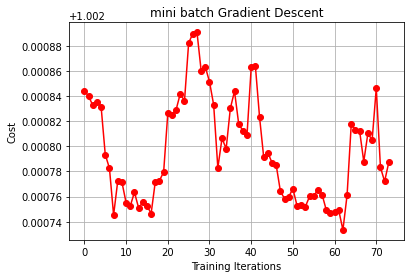

In [ ]:
theta_opt, loss=minibatch(data, theta)
plt.plot(loss,'-ro')
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('mini batch Gradient Descent')

**Task:03: Analyze the performance by changing the learning rate, batch size, and number of iterationa.**